In [1]:
import practicalSPARQL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import practicalSPARQL
import numpy as np
from collections import Counter

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements.xlsx'

In [4]:
df = pd.read_excel(path_to_xlsx)

In [5]:
#all adaption of 100

q = practicalSPARQL.stringify_SPARQL('adaptions_100.sparql')
df_adaptions_100 = sparql.select_as_dataframe(q) 

In [6]:
#all influenced by 100

q = practicalSPARQL.stringify_SPARQL('influenced_100.sparql')
df_influenced_100 = sparql.select_as_dataframe(q) 

In [7]:
#all adaption of 104

q = practicalSPARQL.stringify_SPARQL('adaptions_104.sparql')
df_adaptions_104 = sparql.select_as_dataframe(q) 

In [8]:
#all influenced by 104

q = practicalSPARQL.stringify_SPARQL('Influenced_104.sparql')
df_influenced_104 = sparql.select_as_dataframe(q) 

In [9]:
# adding a part-type column to df 

#Define the value to check for part-type: 100
specific_value_100 = "http://sphaera.mpiwg-berlin.mpg.de/id/part/c6145ca3-317c-4724-a344-3c2e106fe26b"

specific_value_104 = "http://sphaera.mpiwg-berlin.mpg.de/id/part/1eaef0cc-5d5d-45fb-a33c-0fe5b62add79"

# Convert the columns to sets for faster lookup
adaptions_set_100 = set(df_adaptions_100['adaption'])
influenced_set_100 = set(df_influenced_100['influenced_part'])
adaptions_set_104 = set(df_adaptions_104['adaption'])
influenced_set_104 = set(df_influenced_104['influenced_part'])

# Define the function to determine the part type
def determine_part_type(part_or_adaption):
    if part_or_adaption == specific_value_100:
        return '100'
    elif part_or_adaption in adaptions_set_100:
        return 'adaption_100'
    elif part_or_adaption in influenced_set_100:
        return 'influenced_100'
    if part_or_adaption == specific_value_104:
        return '104'
    elif part_or_adaption in adaptions_set_104:
        return 'adaption_104'
    elif part_or_adaption in influenced_set_104:
        return 'influenced_104'
    else:
        return 'other'

# Apply the function to the 'part_or_adaption' column
df['part_type'] = df['part_or_adaption'].apply(determine_part_type)

In [10]:
df

,Unnamed: 0,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,part_or_adaption_label,pagenum,bb,part_type
0,0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Relations Between the Spheres of the Sun an...,SIL_03326,"Sacrobosco, Johannes de;Beyer, Hartmann",Company Heirs of Peter I. Seitz,Company Heirs of Peter I. Seitz,Wittenberg,1550,1594,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,27,"xywh=116,929,875,476",adaption_100
1,1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Diagrams;CK_08 Spheres;CK_Terraq...,SIL_02440,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,5,"xywh=1944,1029,1376,1404",influenced_100
2,2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Sphericity of the Heavens;MVK_Pictorial_Dia...,SIL_03167,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,7,"xywh=2028,1340,638,601",influenced_100
3,3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Illustrations;MTK_Sphericity of ...,SIL_03188,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,9,"xywh=1950,1422,1104,1234",influenced_100
4,4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_2.8 Extended Uses of Sign;CK_Pyramid of a S...,SIL_00191,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,16,"xywh=2172,1190,362,561",influenced_100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21176,21176,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Diagrams;SK_4.4 Cause of lunar e...,SIL_00267,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,339,"xywh=254,288,788,635",influenced_100
21177,21177,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Solar Eclipse;MVK_Pictorial_Diagrams;MTK_So...,SIL_03580,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,340,"xywh=460,276,1026,1504",influenced_100
21178,21178,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Lunar Eclipse;MVK_Pictorial_Diagrams;MTK_Lu...,SIL_03550,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,341,"xywh=130,590,1067,1575",influenced_100
21179,21179,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Lunar Phases;MVK_Pictorial_Diagrams;MTK_Lun...,SIL_03543,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,343,"xywh=281,570,866,1617",influenced_100


In [12]:
df.to_excel('all_elements_with_part_type.xlsx', index=False)

In [28]:
# Count the number of images per part type
image_count_per_part = df.groupby('part_type')['images'].count().reset_index()

# Rename the columns for clarity
image_count_per_part.columns = ['part_type', 'image_count']

In [29]:
image_count_per_part

,part_type,image_count
0,100,1261
1,104,313
2,adaption_100,9598
3,adaption_104,879
4,influenced_100,4469
5,other,4661


In [30]:
#get unique keywords that go with part 100 images

# Step 1: Filter the DataFrame
filtered_df = df[df['part_type'] == '100']

# Step 2 & 3: Extract the 'keywords' column and split by ";"
all_keywords = filtered_df['keywords'].str.split(';')

# Step 4: Flatten the list of lists
flattened_keywords = [keyword for sublist in all_keywords for keyword in sublist]

# Step 5: Get unique keywords
unique_keywords = set(flattened_keywords)


In [31]:
# Step 3: Categorize keywords from unique_keywords
sk_keywords = []
ck_keywords = []
other_keywords = []

for keyword in unique_keywords:
    if keyword.startswith('SK'):
        sk_keywords.append(keyword)
    elif keyword.startswith('CK'):
        ck_keywords.append(keyword)
    else:
        other_keywords.append(keyword)


In [32]:
# Step 4: Print results
print("SK Keywords:")
print(sk_keywords)
print(f"Count: {len(sk_keywords)}\n")

print("CK Keywords:")
print(ck_keywords)
print(f"Count: {len(ck_keywords)}\n")

print("Other Keywords:")
print(other_keywords)
print(f"Count: {len(other_keywords)}\n")

SK Keywords:
['SK_1.5 Their movements', 'SK_3.13 Between the Equator and Tropic of Cancer', 'SK_3.18 at the north pole', 'SK_3.16 At the arctic circle', 'SK_3.19 The Seven Climes', 'SK_3.14 At the Tropic of Cancer', 'SK_1.7 The Heavens Spherical', 'SK_Disputatio_Against Gerard', 'SK_2.8 Extended Uses of Sign', 'SK_2.5 The Zodiac', 'SK_4.4 Cause of lunar eclipse', 'SK_1.11 Surface of the sea spherical', 'SK_3.9 Movement of the Sun', 'SK_1.14 And a Mere Point in the universe', 'SK_3.8 Inequality of Days', 'SK_2.6 The Twelve Signs', 'SK_2.2 The Equinoctial', 'SK_3.15 Between the Tropic and the Arctic Circles', 'SK_2.14 Arctic and Antarctic Circles', 'SK_1.4 The Heavens', 'SK_Theodosius Spherics', 'SK_4.5 Cause of solar eclipse', 'SK_3.1 Rising and settings of the signs', 'SK_1.3 The Four Elements', 'SK_3.7 Oblique Ascensions', 'SK_4.2 Of the other planets: Equant, Deferent, and Epicycle', 'SK_1.9 The earth sphere', 'SK_2.17 The Five Zones', 'SK_1.6 Revolution of the heavens from east to w

In [38]:
# Split keywords by ';' and explode to create one row per keyword
df['keywords'] = df['keywords'].str.split(';')
keyword_df = df.explode('keywords')

# Select relevant columns and drop duplicates to get unique keywords with associated images
keyword_df = keyword_df[['keywords', 'images', 'year', 'place', 'part_type']].drop_duplicates()

In [39]:
keyword_df

,keywords,images,year,place,part_type
0,CK_Relations Between the Spheres of the Sun an...,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1550,Wittenberg,adaption_100
0,MVK_Diagrams,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1550,Wittenberg,adaption_100
1,MVK_Pictorial_Diagrams,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1561,Padua,influenced_100
1,CK_08 Spheres,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1561,Padua,influenced_100
1,CK_Terraqueous Globe,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1561,Padua,influenced_100
...,...,...,...,...,...
21179,MVK_Pictorial_Diagrams,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100
21179,MTK_Lunar Phases_Group_06,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100
21180,MVK_Pictorial_Illustrations,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100
21180,SK_4.4 Cause of lunar eclipse,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100


In [40]:
# Split into SK_df, CK_df, and other_keywords
SK_df = keyword_df[keyword_df['keywords'].str.startswith('SK_')]
CK_df = keyword_df[keyword_df['keywords'].str.startswith('CK_')]
other_keywords = keyword_df[~keyword_df['keywords'].str.startswith(('SK_', 'CK_'))]

In [41]:
SK_df

,keywords,images,year,place,part_type
4,SK_2.8 Extended Uses of Sign,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1561,Padua,influenced_100
6,SK_2.8 Extended Uses of Sign,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1561,Padua,influenced_100
9,SK_1.2 Sphere Divided,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1478,Venice,100
10,SK_3.19 The Seven Climes,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1478,Venice,100
11,SK_4.4 Cause of lunar eclipse,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1478,Venice,100
...,...,...,...,...,...
21173,SK_3.10 Day and Night,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100
21174,SK_4.4 Cause of lunar eclipse,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100
21174,SK_4.5 Cause of solar eclipse,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100
21176,SK_4.4 Cause of lunar eclipse,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1582,Antwerp,influenced_100


In [46]:
# Extract the numeric part after 'SK_' and convert to floats
SK_df.loc[:, 'number'] = SK_df['keywords'].str.extract(r'SK_(\d+\.\d+)').astype(float)

# Sort SK_df by the extracted numeric values
SK_df = SK_df.sort_values('number').drop(columns='number')


In [47]:
SK_df

,keywords,images,year,place,part_type
16717,SK_1.1 Sphere defined,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1591,Wittenberg,influenced_100
14997,SK_1.1 Sphere defined,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1559,Venice,other
8300,SK_1.1 Sphere defined,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1578,Lyon,adaption_100
10777,SK_1.1 Sphere defined,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1604,Siena,adaption_100
10776,SK_1.1 Sphere defined,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1604,Siena,adaption_100
...,...,...,...,...,...
20837,SK_Maurolico Sundial Three Books,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1575,Venice,other
20838,SK_Maurolico Sundial Three Books,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1575,Venice,other
20854,SK_Geom Speculative,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1593,Antwerp,influenced_100
20862,SK_Paratext,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,1555,Antwerp,other


In [71]:
# Filter keywords that start with 'SK' and have a number
sk_with_number = keyword_df[keyword_df['keywords'].str.match(r'SK_\d+\.\d*')].copy()

# Count unique images for each SK keyword
sk_with_number['unique_images_count'] = sk_with_number.groupby('keywords')['images'].transform('nunique')

# Select relevant columns for final output
sk_results = sk_with_number[['keywords', 'unique_images_count']].drop_duplicates()

# Extract the numeric part after 'SK_' and convert to float for sorting
sk_results[['integer_part', 'decimal_part']] = sk_results['keywords'].str.extract(r'SK_(\d+)\.(\d+)').astype(float)

# Sort by the extracted numeric values
sk_results = sk_results.sort_values(by=['integer_part', 'decimal_part']).drop(columns=['integer_part', 'decimal_part'])


In [72]:
sk_results

,keywords,unique_images_count
23,SK_1.1 Sphere defined,712
9,SK_1.2 Sphere Divided,804
26,SK_1.3 The Four Elements,116
149,SK_1.4 The Heavens,49
27,SK_1.5 Their movements,292
80,SK_1.6 Revolution of the heavens from east to ...,74
28,SK_1.7 The Heavens Spherical,764
29,SK_1.9 The earth sphere,188
30,SK_1.11 Surface of the sea spherical,325
31,SK_1.13 The earth central,334


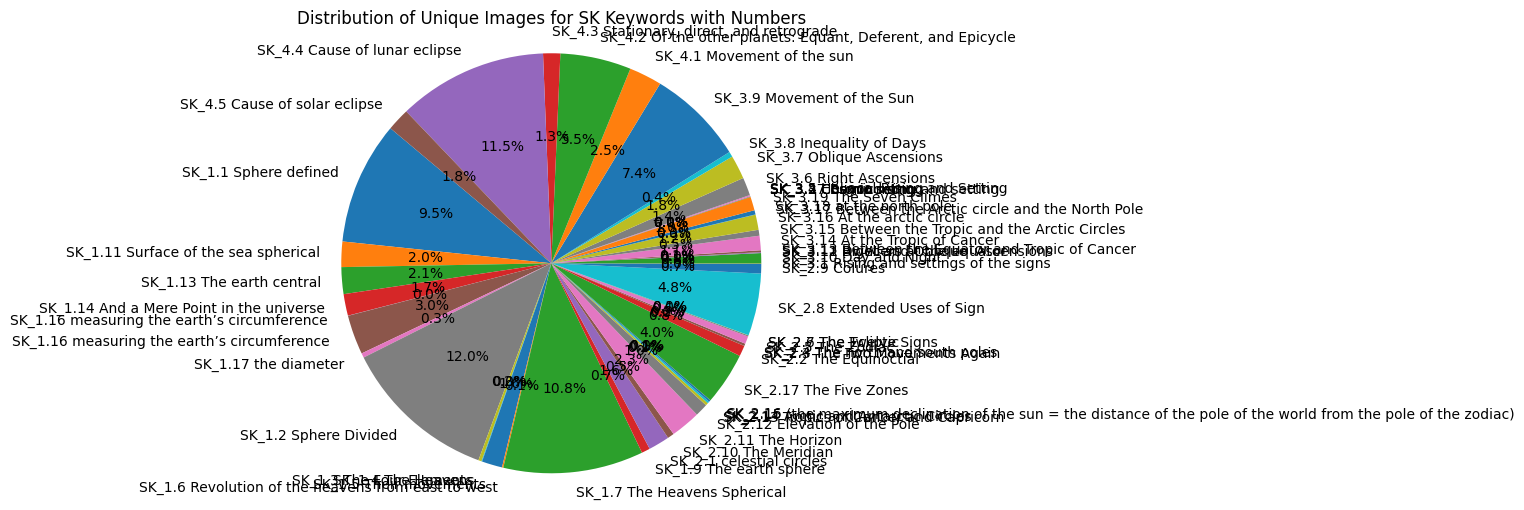

In [51]:
# Create a DataFrame for pie plot
pie_data = sk_with_number.groupby('keywords')['unique_images_count'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_data['unique_images_count'], labels=pie_data['keywords'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Images for SK Keywords with Numbers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()